# Assignment 2 – Kaggle Challenge - Credit Scoring Analysis

___
### Hello hello, here is the list of everything that you will see in this notebook!!
___
Let's have a look:
1. Data Loading & Visualization
2. Separation of X and Y
2. Data Preprocessing
    - Outlier Handling with transformations
    - Normalization
    - Encoding X Categorical Variables
    - Encoding Y
    - Data reduction??
3. Feature Engineering
    - Study of correlation between features and Y
    - Feature selection
    - Creating new features??
4. Split of dataset into Training set and Validation set

5. Model: Neural Network Regression
    - Training
    - Evaluation
    - Hyperparameter tuning??
6. Generation of the CSV for submission

*Note: The steps with "??" are propositions that are not done yet.*


# Data Loading
This section is for loading the training dataset into a pandas DataFrame, and checking for duplicates and missing values.

In [2]:
import pandas as pd
import numpy as np

# Load the training data
train_set_csv = pd.read_csv('Data/train_set.csv')
display(train_set_csv.head())

# Understand shape of data
print(f'Shape: {train_set_csv.shape}')

# Check for duplicates
num_duplicates = train_set_csv.duplicated().sum()
print(f'Number of duplicate rows: {num_duplicates}')

# Check for missing values
num_missing = train_set_csv.isnull().sum().sum()
print(f'Number of missing values: {num_missing}')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,84094,23943,5,Leonoray,18.0,84355102.0,Journalist,70260.20,5564.016667,9.0,...,Bad,2228.79,25.308445,217.0,Yes,246.378645,99.939577,Low_spent_Small_value_payments,78.800397,Poor
1,46702,29066,5,Osamua,21.0,981149909.0,Teacher,18001.59,1258.132500,7.0,...,Bad,2225.58,32.088726,240.0,NM,24.986447,45.523998,Low_spent_Small_value_payments,343.581411,Poor
2,147514,8183,5,Benf,47.0,324295086.0,Developer,9824.31,707.692500,7.0,...,Standard,1233.96,25.500503,227.0,No,0.000000,22.006889,Low_spent_Medium_value_payments,322.170689,Good
3,16675,27938,2,Matt Falloonm,41.0,564682345.0,Entrepreneur,87481.62,7022.135000,0.0,...,Good,214.43,38.505066,282.0,No,55.653369,56.550721,High_spent_Medium_value_payments,726.849284,Standard
4,84080,38740,3,Seetharamank,53.0,228116416.0,Manager,129204.92,10508.076667,5.0,...,Standard,1075.37,38.359175,289.0,Yes,277.610885,165.019535,High_spent_Large_value_payments,742.018547,Standard


Shape: (70000, 28)
Number of duplicate rows: 0
Number of missing values: 0


# Data Visualization
Function to visualize each column in the dataset to understand their distributions and characteristics.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import numpy as np

def plot_columns(df_to_plot):
    """
    Function to plot each column of a dataframe.
    For numerical data: creates a boxplot and histogram.
    For categorical data:
        - Bar chart if less than or equal to 15 categories.
        - Text info about the number of categories if more than 15 categories.

    Parameters:
    df_to_plot: DataFrame
        The dataframe to visualize.
    """

    print(f'\n\nShape of the dataframe: {df_to_plot.shape}\n\n\n')

    # Set the aesthetics for the plots
    sns.set(style="darkgrid")

    # Number of columns for the main grid
    n_cols = 3

    # Adjust the number of rows considering the layout for numerical data
    n_rows = int(np.ceil(len(df_to_plot.columns) / n_cols)) * 2

    # Create grid
    plt.figure(figsize=(15, n_rows * 2))
    grid = gridspec.GridSpec(n_rows, n_cols, figure=plt.gcf(), hspace=1.5, wspace=0.5)

    # Loop through each column in the dataframe
    for i, column in enumerate(df_to_plot.columns):
        # Calculate row index considering the new layout
        row_idx = (i // n_cols) * 2
        col_idx = i % n_cols

        # Numeric data
        if np.issubdtype(df_to_plot[column].dtype, np.number):
            # Nested grid for so that histogram is 7 times higher than boxplot
            nested_grid = gridspec.GridSpecFromSubplotSpec(8, 1, subplot_spec=grid[row_idx:row_idx + 2, col_idx], hspace=0.1)

            # Boxplot
            ax_box = plt.subplot(nested_grid[0])
            sns.boxplot(x=df_to_plot[column], ax=ax_box)
            ax_box.set_title(column, fontsize=16)
            ax_box.set_xlabel('')

            # Histogram
            ax_hist = plt.subplot(nested_grid[1:])
            sns.histplot(df_to_plot[column], bins=30, ax=ax_hist)
            ax_hist.set_title("")
            ax_hist.set_xlabel('')

        else:
            # Categorical data
            if df_to_plot[column].nunique() <= 15:
                # Bar chart
                ax_bar = plt.subplot(grid[row_idx:row_idx + 2, col_idx])
                sns.countplot(x=df_to_plot[column], ax=ax_bar)
                ax_bar.set_title(column, fontsize=16)
                ax_bar.set_xticklabels(ax_bar.get_xticklabels(), rotation=45)
                ax_bar.set_xlabel('')

            else:
                # Display text information for categories more than 15
                ax_text = plt.subplot(grid[row_idx:row_idx + 2, col_idx])
                top_categories = df_to_plot[column].value_counts().head(5)
                text_str = f'Number of categories: {df_to_plot[column].nunique()}\n\nTop 5 categories:\n{top_categories.to_string()}'
                ax_text.text(0.5, 0.5, text_str, ha='center', va='center', fontsize=12)
                ax_text.axis('off')
                ax_text.set_title(column, fontsize=16)

    # Adjust layout to fit everything
    plt.tight_layout()
    plt.show()


# Separation of X and Y

In [4]:
# Extract the feature columns (X)
X = train_set_csv.drop(columns=['Credit_Score'])

# Extract the targ[et column (y)
Y = train_set_csv[['Credit_Score']]

Feature engineering idea: Based on Customer_ID and time we should create a column that contains the past credit scores of a customer.



Shape of the dataframe: (70000, 27)





C:\Users\Markou\AppData\Local\Temp\ipykernel_14816\3518248179.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


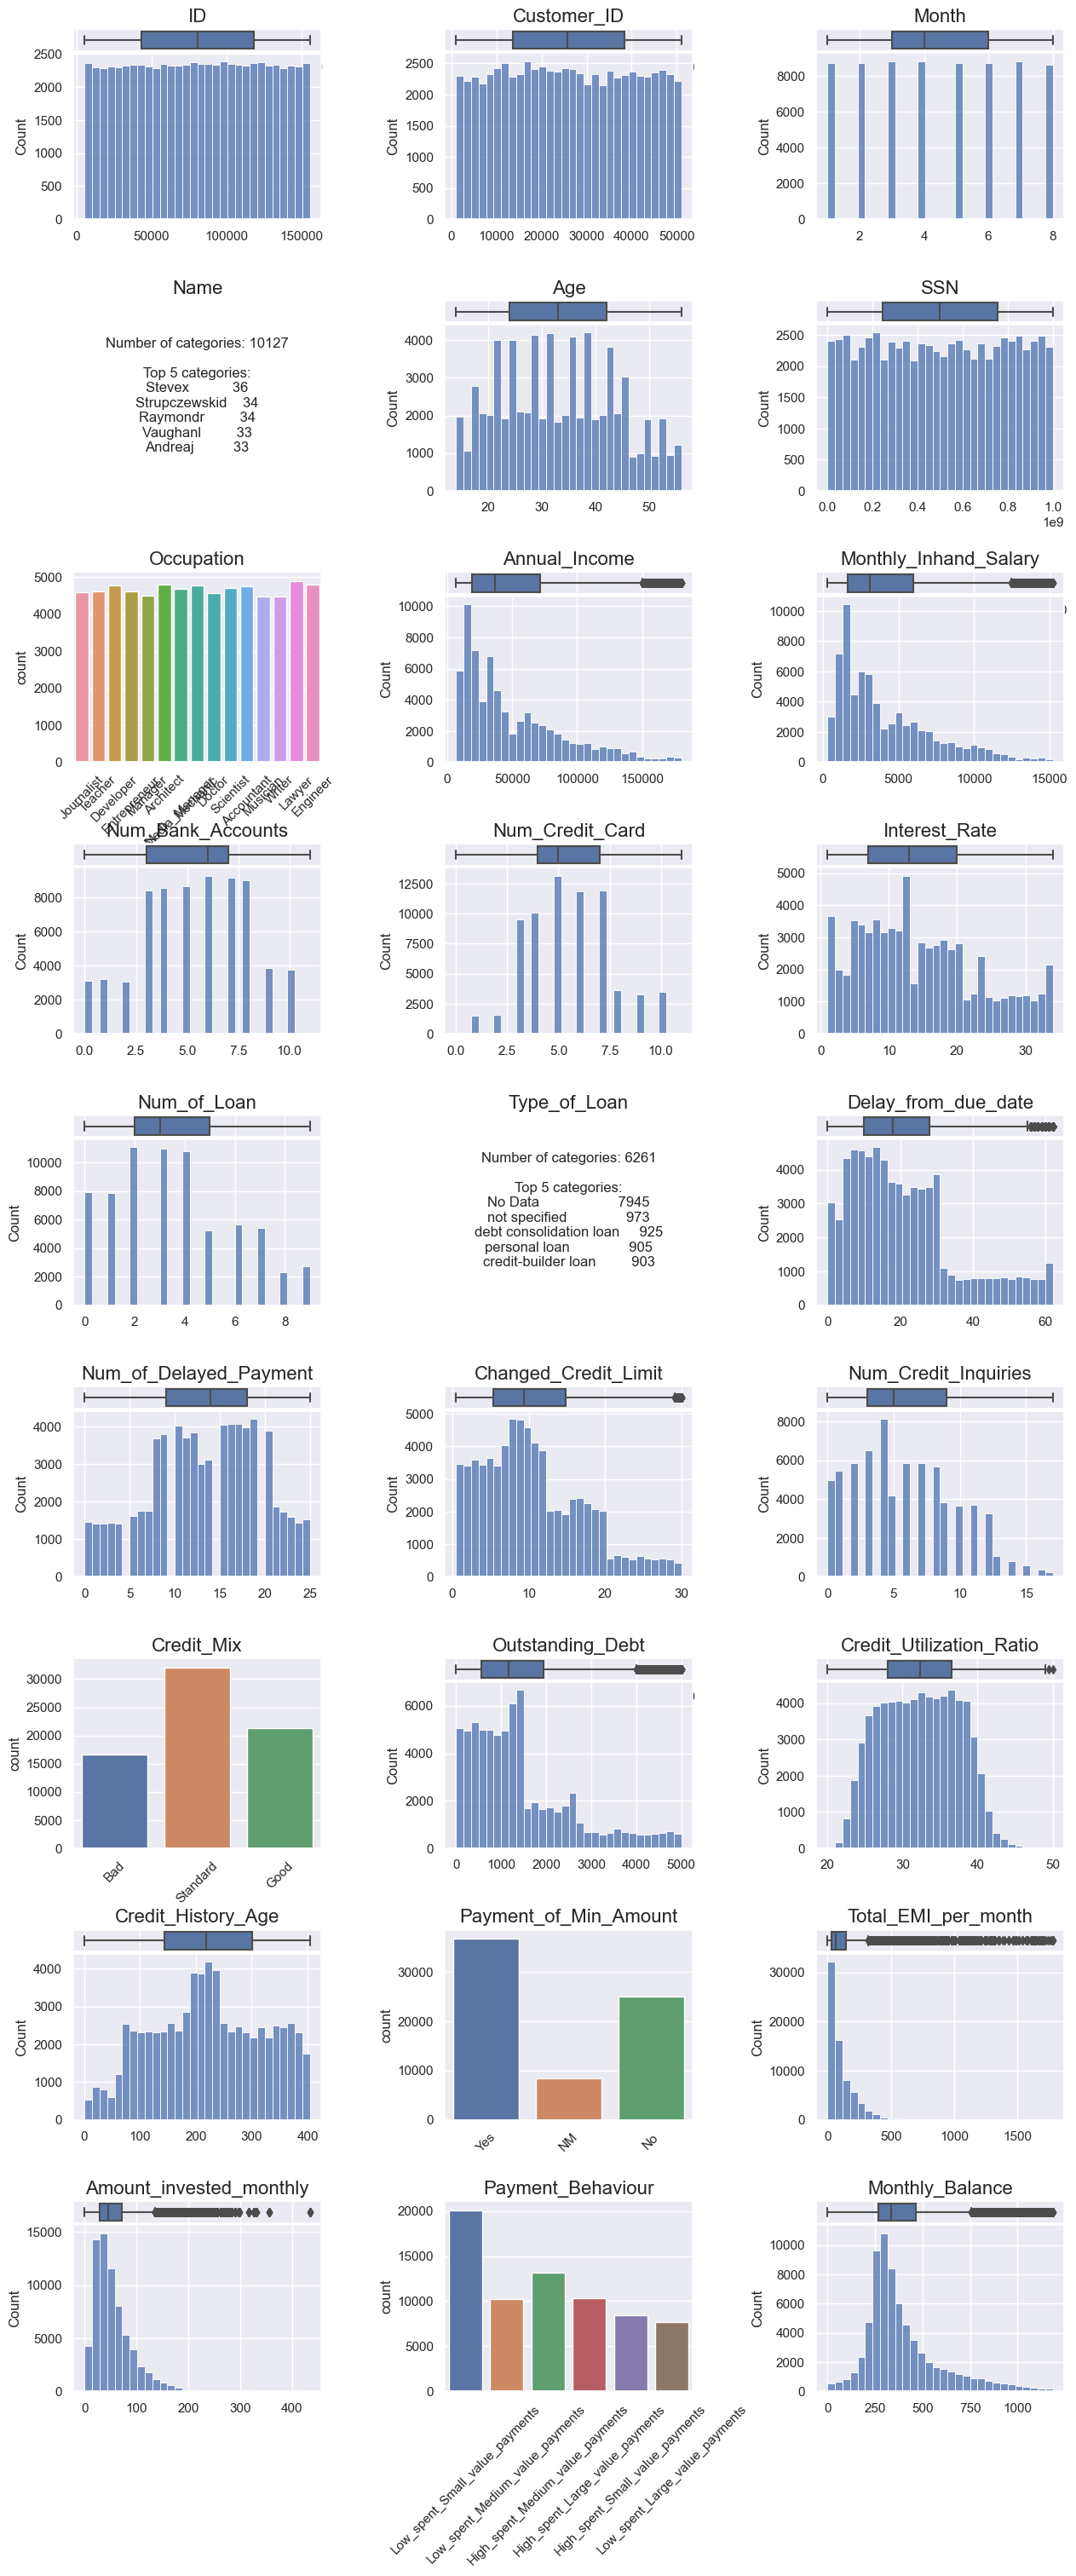

In [5]:
plot_columns(X)

In [25]:
X["Customer_ID"].value_counts()

16830    8
31016    8
13587    8
40066    8
21394    8
        ..
43559    1
27751    1
41264    1
42811    1
27461    1
Name: Customer_ID, Length: 12498, dtype: int64

In [28]:
train_set_csv.query(" Customer_ID == 31016")

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
765,76030,31016,5,Rs,40.0,984813172.0,Media_Manager,81047.56,6565.963333,1.0,...,Good,1290.47,31.845518,236.0,No,153.201688,46.187263,Low_spent_Medium_value_payments,265.425326,Good
4252,76032,31016,7,Rs,40.0,984813172.0,Media_Manager,81047.56,6565.963333,1.0,...,Good,1290.47,32.288594,238.0,No,153.201688,46.187263,High_spent_Small_value_payments,452.269940,Good
12719,76026,31016,1,Rs,40.0,984813172.0,Media_Manager,81047.56,6565.963333,1.0,...,Good,1290.47,39.836353,232.0,No,153.201688,46.187263,High_spent_Large_value_payments,666.251960,Good
31378,76033,31016,8,Rs,40.0,984813172.0,Media_Manager,81047.56,6565.963333,1.0,...,Good,1290.47,32.528275,239.0,No,153.201688,46.187263,High_spent_Small_value_payments,599.237406,Good
31817,76029,31016,4,Rs,40.0,984813172.0,Media_Manager,81047.56,6565.963333,1.0,...,Good,1290.47,32.019705,235.0,No,153.201688,46.187263,Low_spent_Large_value_payments,280.692260,Good
43815,76028,31016,3,Rs,40.0,984813172.0,Media_Manager,81047.56,6565.963333,1.0,...,Good,1290.47,38.154775,234.0,No,153.201688,46.187263,Low_spent_Medium_value_payments,342.873583,Standard
44780,76027,31016,2,Rs,40.0,984813172.0,Media_Manager,81047.56,6565.963333,1.0,...,Good,1290.47,24.594073,233.0,No,153.201688,46.187263,High_spent_Small_value_payments,613.580015,Good
60011,76031,31016,6,Rs,40.0,984813172.0,Media_Manager,81047.56,6565.963333,1.0,...,Good,1290.47,27.472188,237.0,No,153.201688,46.187263,High_spent_Medium_value_payments,590.343515,Good




Shape of the dataframe: (70000, 1)





C:\Users\Markou\AppData\Local\Temp\ipykernel_14816\3518248179.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


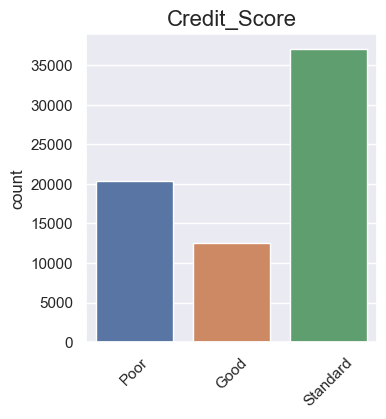

In [6]:
plot_columns(Y)

# Data Preprocessing

**WARNING: DO NOT RUN THE SAME CELL TWICE, AS THE TRANSFORMATION MAY BE APPLIED TWICE.**

If you have made a modification, run each cell from here to re-create the X_preprocessed from X.
___
Input: X, Y

Output: X_preprocessed, Y_processed.
___

Steps:
- Numerical features
  - Outlier Handling (log and sqrt)
  - Normalization
- Categorical variables
  - Encoding (One-Hot, Ordinal, etc)


## Outlier Handling with Transformations
In this step, we apply transformations to certain financial features to reduce the impact of outliers.

We use the log transformation and the sqrt transformation, which are effective for skewed data.

In [7]:
def preprocess_outliers(X):

  # SQRT
  columns_to_sqrt = ['Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt', 'Monthly_Balance']
  for col in columns_to_sqrt:
      insert_index = X.columns.get_loc(col)
      X.insert(insert_index + 1, col + ' (SQRT)', X[col].apply(np.sqrt))
      X.drop(col, axis=1, inplace=True)

  # LOG
  columns_to_log = ['Total_EMI_per_month', 'Amount_invested_monthly']
  for col in columns_to_log:
      insert_index = X.columns.get_loc(col)
      X.insert(insert_index + 1, col + ' (LOG)', X[col].apply(lambda x: np.log(x + 1)))
      X.drop(col, axis=1, inplace=True)

  return X



## Normalization
This step has to come after having applied log and sqrt to make the distributions more normal. Indeed, if we standardize first, the outliers will still have a significant effect on the mean and standard deviation, potentially leading to less effective standardization.

In [8]:
from sklearn.preprocessing import StandardScaler

def preprocess_normalization(X):
  # Initialize the StandardScaler
  scaler = StandardScaler()

  # Selecting numerical columns
  numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

  # Applying StandardScaler to the numerical columns
  X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

  return X

## Encoding X categorical variables
In this section, we are encoding the categorical variables using different techniques based on the nature of each variable.
These encoding steps are essential for converting categorical data into a format that can be effectively used by various machine learning algorithms.


#### Column "Occupation" (One-Hot Encoding)

___

Converted to 15 columns ('Occupation_Journalist', 'Occupation_Teacher'...), with 1 column having a 1 and 14 columns having a 0.

Reason: No natural ordered relationship betweend those categories.

___

**Example:**

|Occupation|
|-|
|"Teacher"|

Is encoded as:

| Occupation_Accountant | Occupation_Architect | Occupation_Developer | Occupation_Doctor | Occupation_Engineer | Occupation_Entrepreneur | Occupation_Journalist | Occupation_Lawyer | Occupation_Manager | Occupation_Mechanic | Occupation_Media_Manager | Occupation_Musician | Occupation_Scientist | Occupation_Teacher | Occupation_Writer |
|-----------------------|----------------------|----------------------|------------------|---------------------|------------------------|---------------------|-----------------|-----------------|--------------------|---------------------------|--------------------|-------------------|------------------|-----------------|
| 0                     | 0                    | 0                    | 0                | 0                   | 0                      | 0                   | 0               | 0               | 0                  | 0                         | 0                  | 0                 | 1                | 0               |


In [9]:
def encoding_occupation(X):
  # Creating 15 columns 'Occupation_Journalist', 'Occupation_Teacher', ...
  occupation_dummies = pd.get_dummies(X['Occupation'], prefix='Occupation')
  #Adding the columns generated at the right place in the df
  insert_index = X.columns.get_loc('Occupation')
  df_left = X.iloc[:, :insert_index]
  df_right = X.iloc[:, insert_index:]
  X = pd.concat([df_left, occupation_dummies, df_right], axis=1)

  # Drop the original column
  X.drop(['Occupation'], axis=1, inplace=True)
  return X

#### Column "Payment_of_Min_Amount" (One-Hot Encoding)
___

Converted to 2 columns ("Payment_of_Min_Amount_Yes", "Payment_of_Min_Amount_NM"), with at least a 0 in one column.

Reason: No natural ordered relationship betweend those categories.

*Note: The column Payment_of_Min_Amount_No is dropped, as it was redundant with Payment_of_Min_Amount_Yes*

___

**Example:**

| Payment_of_Min_Amount |
| - |
|"No"|

Is encoded as:

|Payment_of_Min_Amount_Yes|Payment_of_Min_Amount_NM|
|-|-|
| 0 | 0 |

In [10]:
def encoding_payment_of_min_amount(X):

  # Creating 2 columns 'Payment_of_Min_Amount_Yes', 'Payment_of_Min_Amount_NM'
  payment_min_amount_dummies = pd.get_dummies(X['Payment_of_Min_Amount'], prefix='Payment_of_Min_Amount')
  #Adding the columns generated at the right place in the df
  insert_index = X.columns.get_loc('Payment_of_Min_Amount')
  df_left = X.iloc[:, :insert_index]
  df_right = X.iloc[:, insert_index:]
  X = pd.concat([df_left, payment_min_amount_dummies, df_right], axis=1)
  #Drop the column No as it is redundant with Yes
  X.drop('Payment_of_Min_Amount_No', axis=1, inplace=True)

  # Drop the original column
  X.drop(['Payment_of_Min_Amount'], axis=1, inplace=True)
  return X

#### Column "Credit_Mix" (Ordinal Encoding)

___
Converted to 1 column containing either 1, 2 or 3.

Reason: Natural ordered relationship.
___

**Example:**

|Credit_Mix|
|-|
|"Standard"|

Is encoded as:

|Credit_Mix|
|-|
| 2 |

In [11]:
def encoding_credit_mix(X):

  # Mapping for ordinal encoding
  credit_mix_mapping = {'Bad': 1, 'Standard': 2, 'Good': 3}

  # Applying ordinal encoding
  X['Credit_Mix'] = X['Credit_Mix'].map(credit_mix_mapping)

  return X

#### Column "Payment_Behaviour" (double ordinal encoding)
___

Converted to 2 columns: "Payment_Behaviour_Spent" being either 0 or 1 and "Payment_Behaviour_Value" being either 1, 2 or 3.

Reason: The values of this column are strings that represent 2 ordinal features.
___

**Example:**

|Credit_Score|
|-|
|"High_spent_Medium_value_payments"|

Is encoded as:

|Payment_Behaviour_Spent|Payment_Behaviour_Value|
|-|-|
| 1 |2|

In [12]:
#PAYMENT_BEHAVIOUR

def mapping_payment_behaviour(value):
    mapping = {
        'Low_spent_Small_value_payments': (0, 1),
        'Low_spent_Medium_value_payments': (0, 2),
        'Low_spent_Large_value_payments': (0, 3),
        'High_spent_Small_value_payments': (1, 1),
        'High_spent_Medium_value_payments': (1, 2),
        'High_spent_Large_value_payments': (1, 3)
    }
    return mapping.get(value)

def encode_payment_behaviour(X):

  # Find the index of the original column
  col_index = X.columns.get_loc('Payment_Behaviour')

  # Vectorize the mapping to new columns
  columns_to_add = list(zip(*X['Payment_Behaviour'].map(mapping_payment_behaviour)))

  # Insert the new columns at the original column's place
  X.insert(col_index, 'Payment_Behaviour_Spent', columns_to_add[0])
  X.insert(col_index + 1, 'Payment_Behaviour_Value', columns_to_add[1])

  # Drop the original column
  X.drop(['Payment_Behaviour'], axis=1, inplace=True)

  return X

#### Column "Type_of_Loan" (Multi-Label One-Hot Encoding)
___
Converted to 10 columns ("Type_of_loan (home equity loan)", "Type_of_Loan (credit-builder loan)"...), including one column "not specified" and one column "no data", where each row can have multiple values 1.

Reason: The values of this column are strings that can specify multiple types of loan that the person has.
___

**Example:**

|Credit_Score|
|-|
|"payday loan,mortgage loan,student loan,not specified,home equity loan"|

Is encoded as:

| Type_of_Loan (home equity loan)       | Type_of_Loan (credit-builder loan)   | Type_of_Loan (auto loan)         | Type_of_Loan (mortgage loan)     | Type_of_Loan (not specified)     | Type_of_Loan (payday loan)       | Type_of_Loan (student loan)     | Type_of_Loan (No Data)          | Type_of_Loan (debt consolidation loan) | Type_of_Loan (personal loan)   |
|--------------------------------------|-------------------------------------|----------------------------------|----------------------------------|----------------------------------|----------------------------------|----------------------------------|----------------------------------|-------------------------------------------|------------------------------|
| 1                                    | 0                                   | 0                                | 1                                | 1                                | 1                                | 1                                | 0                                | 0                                         | 0                            |


In [13]:
def encode_type_of_loan(X):

  # Split the string on commas and create a list of loan types
  X['Type_of_Loan'] = X['Type_of_Loan'].str.split(',')

  # Identify all unique loan types
  unique_loan_types = set()
  for loan_list in X['Type_of_Loan']:
      unique_loan_types.update(loan_list)

  # Create binary columns for each loan type
  for loan_type in unique_loan_types:
      name_of_new_column = f'Type_of_Loan ({loan_type})'
      new_column = X['Type_of_Loan'].apply(lambda x: 1 if loan_type in x else 0)
      insert_index = X.columns.get_loc("Type_of_Loan")
      X.insert(insert_index, name_of_new_column, new_column)

  # Drop the original column
  X.drop('Type_of_Loan', axis=1, inplace=True)

  return X

## Encoding Y

#### Column "Credit_Score"

___
Converted to 1 column containing either 1, 2 or 3.

Reason: Natural ordered relationship.
___

**Example:**

|Credit_Score|
|-|
|"Poor"|

Is encoded as:

|Credit_Score|
|-|
| 1 |

In [14]:
def encode_Y(Y):
  # Mapping for ordinal encoding
  credit_score_mapping = {'Poor': 1, 'Standard': 2, 'Good': 3}

  # Applying ordinal encoding
  Y['Credit_Score'] = Y['Credit_Score'].map(credit_score_mapping)
  return Y

### Piping preprocessing functions

In [15]:
def full_preprocess_X(X):

  X = X.copy() # So that the function doesn't change the original X variable

  X = preprocess_outliers(X)
  X = preprocess_normalization(X)
  X = encoding_occupation(X)
  X = encoding_payment_of_min_amount(X)
  X = encoding_credit_mix(X)
  X = encode_payment_behaviour(X)
  X = encode_type_of_loan(X)

  return X

def full_preprocess_Y(Y):

  Y = Y.copy() # So that the function doesn't change the original X variable

  Y = encode_Y(Y)
  return Y

## Creating the preprocessed sets



Shape of the dataframe: (70000, 52)





C:\Users\Markou\AppData\Local\Temp\ipykernel_14816\3518248179.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


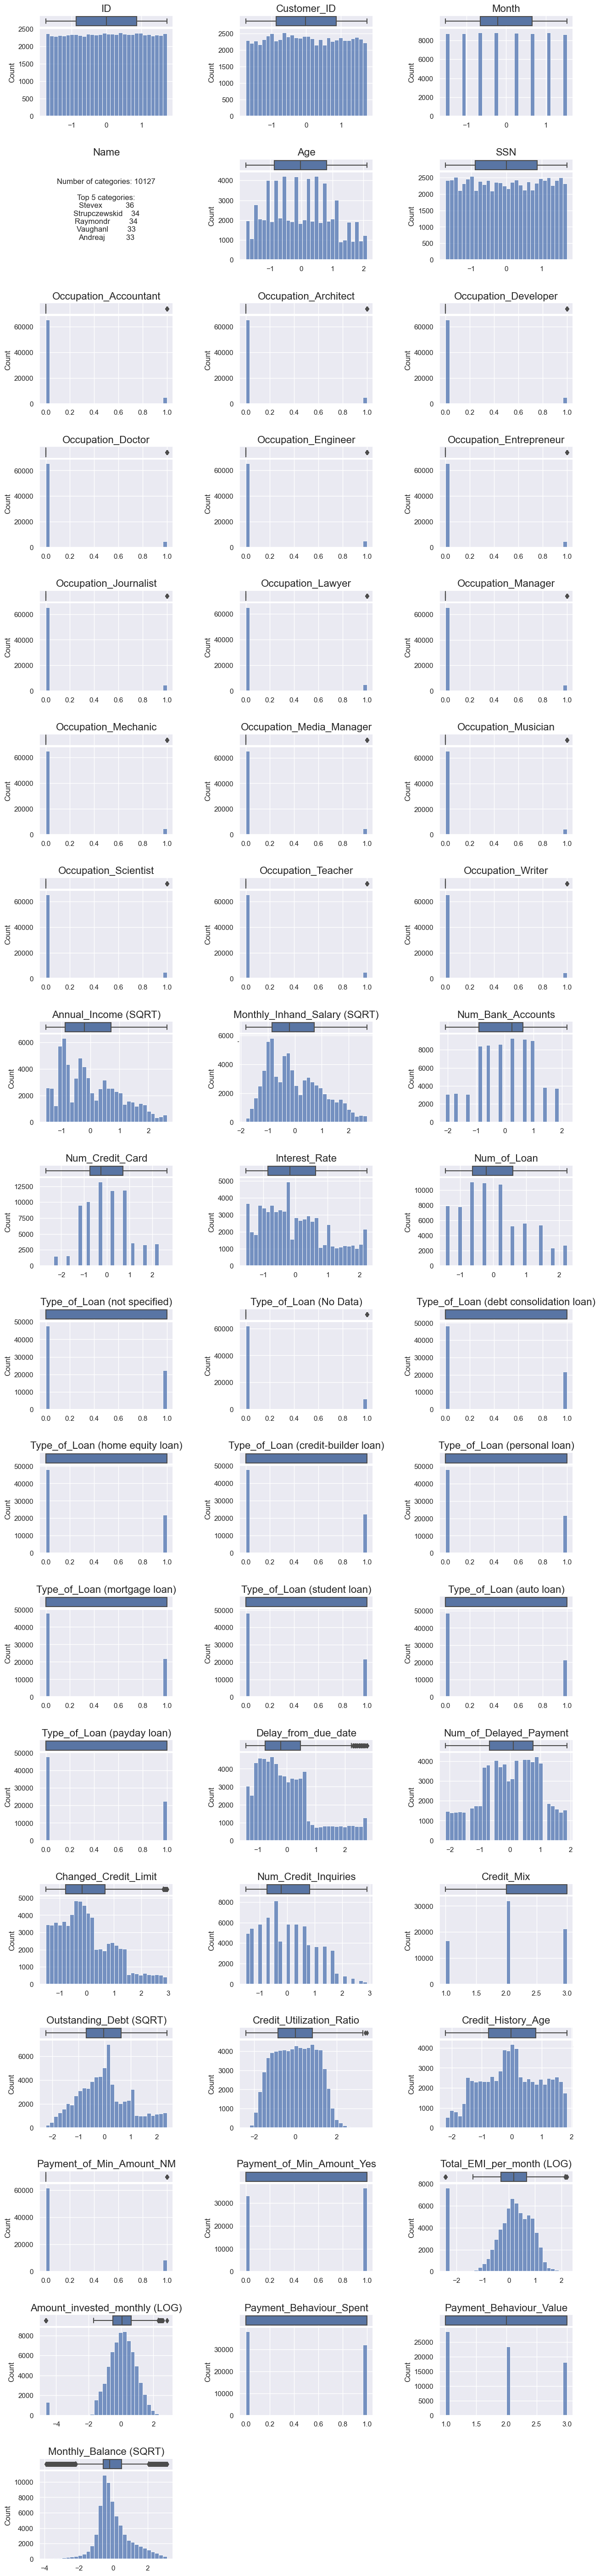



Shape of the dataframe: (70000, 1)





C:\Users\Markou\AppData\Local\Temp\ipykernel_14816\3518248179.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


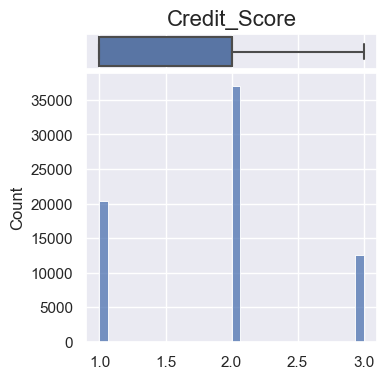

In [16]:
X_preprocessed = full_preprocess_X(X)
Y_preprocessed = full_preprocess_Y(Y)

plot_columns(X_preprocessed)
plot_columns(Y_preprocessed)

# Feature Engineering

In [17]:
# Make sure that we haven't forgotten any feature during the preprocessing compared to the original X.

#print(f'Original columns before processing: {X.columns}\n')

## Understanding correlation of features with the Credit_Score

- We are also going create a correlation heatmap.

C:\Users\Markou\AppData\Local\Temp\ipykernel_14816\2327394877.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = round(X.loc[:,X.columns != 'Credit_Score'].corr(),2)


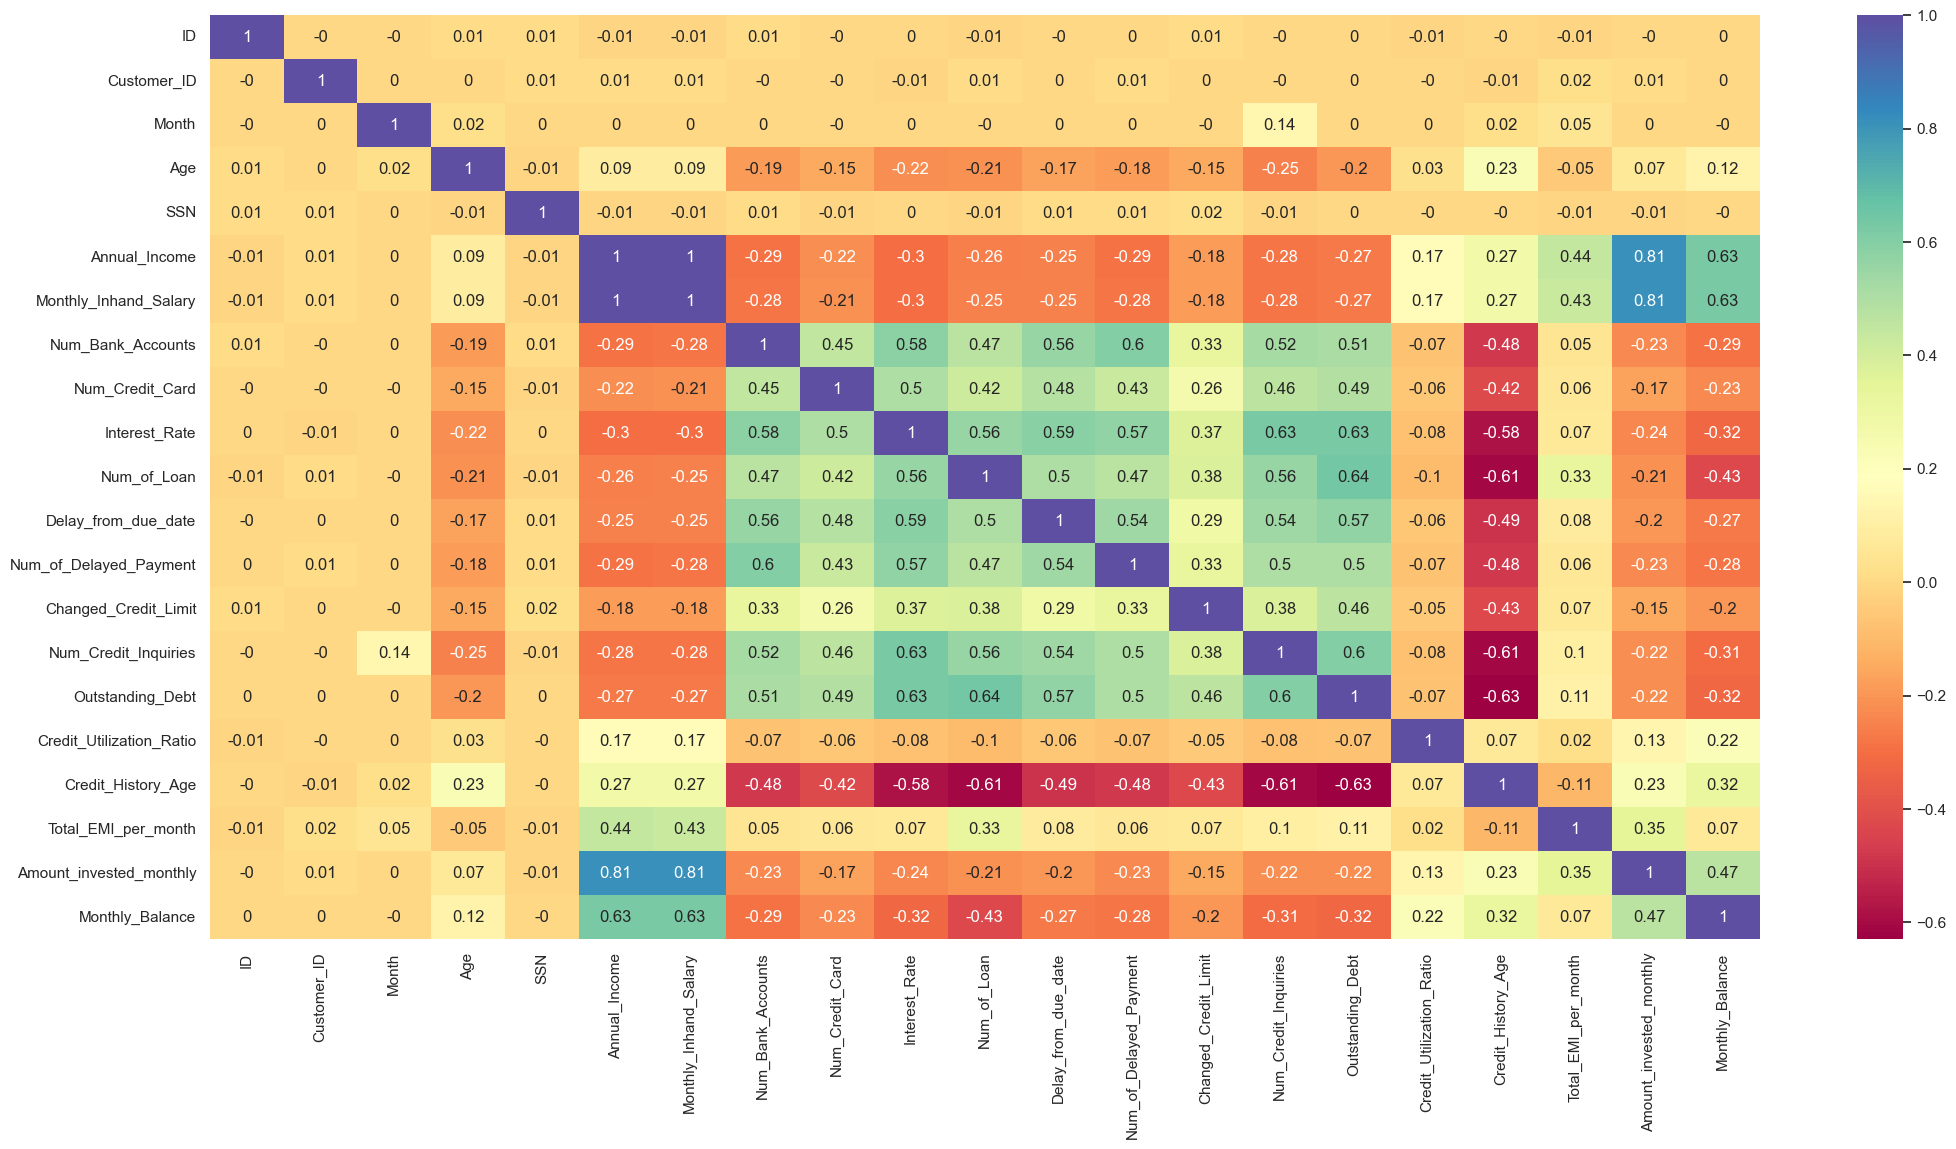

In [29]:
plt.figure(figsize=(25,12))
cor = round(X.loc[:,X.columns != 'Credit_Score'].corr(),2)
sns.heatmap(cor, annot=True, cmap="Spectral")
plt.show()

In [18]:
# Drop features that are not numerical
X_preprocessed_numerical_columns_only = X_preprocessed.drop("Name", axis=1)

# Create a df with correlation of every column
correlation_df = X_preprocessed_numerical_columns_only.apply(lambda col: col.corr(Y_preprocessed["Credit_Score"]))

#Show correlation of individual features with the Credit Score
print('Correlations with "Credit Score":\n')
display(correlation_df.loc[correlation_df.abs().sort_values(ascending=False).index].round(2))

Correlations with "Credit Score":



Credit_Mix                                0.50
Interest_Rate                            -0.48
Num_Credit_Inquiries                     -0.44
Delay_from_due_date                      -0.43
Num_Credit_Card                          -0.41
Outstanding_Debt (SQRT)                  -0.40
Num_Bank_Accounts                        -0.39
Credit_History_Age                        0.39
Payment_of_Min_Amount_Yes                -0.38
Num_of_Delayed_Payment                   -0.37
Num_of_Loan                              -0.36
Annual_Income (SQRT)                      0.22
Monthly_Inhand_Salary (SQRT)              0.21
Monthly_Balance (SQRT)                    0.20
Changed_Credit_Limit                     -0.17
Amount_invested_monthly (LOG)             0.16
Age                                       0.16
Type_of_Loan (No Data)                    0.16
Type_of_Loan (auto loan)                 -0.15
Type_of_Loan (mortgage loan)             -0.14
Type_of_Loan (credit-builder loan)       -0.14
Type_of_Loan 

## Feature Selection

In [19]:
# MANUAL VERSION
columns_X_to_train_on_manual = [
                         #'ID',
                         #'Customer_ID',
                         #'Month',
                         #'Name',
                         'Age',
                         #'SSN',
                         'Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager', 'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher','Occupation_Writer',
                         'Annual_Income (SQRT)',
                         'Payment_of_Min_Amount_NM', 'Payment_of_Min_Amount_Yes',
                         'Monthly_Inhand_Salary (SQRT)',
                         'Num_Bank_Accounts',
                         'Num_Credit_Card',
                         'Interest_Rate',
                         'Num_of_Loan',
                         'Type_of_Loan (mortgage loan)', 'Type_of_Loan (not specified)', 'Type_of_Loan (auto loan)', 'Type_of_Loan (payday loan)', 'Type_of_Loan (debt consolidation loan)', 'Type_of_Loan (personal loan)', 'Type_of_Loan (home equity loan)', 'Type_of_Loan (student loan)', 'Type_of_Loan (credit-builder loan)', 'Type_of_Loan (No Data)',
                         'Delay_from_due_date',
                         'Num_of_Delayed_Payment',
                         'Changed_Credit_Limit',
                         'Num_Credit_Inquiries',
                         'Credit_Mix',
                         'Outstanding_Debt (SQRT)',
                         'Credit_Utilization_Ratio',
                         'Credit_History_Age',
                         'Total_EMI_per_month (LOG)',
                         'Amount_invested_monthly (LOG)',
                         'Payment_Behaviour_Spent',
                         'Payment_Behaviour_Value',
                         'Monthly_Balance (SQRT)'
                         ]


# AUTOMATIC VERSION
columns_X_to_train_on_automatic = correlation_df[correlation_df.abs() > 0].index


# CHOICE OF VERSION
columns_X_to_train_on = columns_X_to_train_on_automatic

print(f'Columns_X_to_train_on: {columns_X_to_train_on}')




Columns_X_to_train_on: Index(['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Occupation_Accountant',
       'Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Annual_Income (SQRT)',
       'Monthly_Inhand_Salary (SQRT)', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan (not specified)',
       'Type_of_Loan (No Data)', 'Type_of_Loan (debt consolidation loan)',
       'Type_of_Loan (home equity loan)', 'Type_of_Loan (credit-builder loan)',
       'Type_of_Loan (personal loan)', 'Type_of_Loan (mortgage loan)',
       'Type_of_Loan (student loan)', 'Type_of_Loan (auto loan)',
       'Type_of_Loan (payday loan)', 'Delay_from_due_date',
     

In [20]:
def feature_engineer_X(X_preprocessed):

  X_feature_engineered = X_preprocessed.copy()

  # Creating the df with selected features
  X_feature_engineered = X_feature_engineered[columns_X_to_train_on]
  Y_with_selected_features = Y_preprocessed

  # Convert to numpy for the training
  X_feature_engineered = np.array(X_feature_engineered)
  Y_with_selected_features = np.array(Y_preprocessed)

  return X_feature_engineered

def feature_engineer_Y(Y_preprocessed):

  Y_feature_engineered = Y_preprocessed.copy()

  Y_feature_engineered = Y_preprocessed

  # Convert to numpy for the training
  Y_feature_engineered = np.array(Y_preprocessed)

  return Y_feature_engineered



### Creating the sets with selected features and conversion to numpy

In [21]:
X_feature_engineered = feature_engineer_X(X_preprocessed)
Y_feature_engineered = feature_engineer_Y(Y_preprocessed)

# Split the dataset into Training set and Validation set
Note that the real test set is the one from test_set.csv, for which we cannot know the accuracy since we don't have the labels.

In [22]:
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train, X_val, y_train, y_val = train_test_split(X_feature_engineered, Y_feature_engineered, test_size=0.2, random_state=42)

# Model: Neural Network Regression

## Training

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import LambdaCallback
import time

from keras.regularizers import l2

def train_nn_regression(epoch, batch_size, lambda_value):

    print(f'Training with epoch={epoch}, batch_size={batch_size}, lambda_value={lambda_value}...')
    # Build the neural network with L2 regularization
    model = Sequential()
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(lambda_value), input_shape=(X_train.shape[1],)))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(lambda_value)))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(lambda_value)))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(lambda_value)))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(lambda_value)))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(lambda_value)))
    model.add(Dense(1, activation='linear'))  # Single output neuron with a linear activation

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])


    # Train the model
    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=epoch, batch_size=batch_size, validation_data=(X_val, y_val), verbose=0)
    end_time = time.time()
    duration = end_time - start_time
    print(f"Training duration: {duration / 60:.2f} seconds")

    # Short learning curve
    plt.figure(figsize=(8, 4))

    plt.plot(history.history['loss'], label='Train')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.show()
    return model, history

ModuleNotFoundError: No module named 'tensorflow'

## Evaluation

In [ ]:
#Evaluate
from sklearn.metrics import accuracy_score

def predict_numbers(X):
  # Make the predictions, that can be any real number
  numbers_predicted = model.predict(X, verbose=0)

  # Convert to 1, 2 or 3
  numbers_predicted[numbers_predicted < 1.5] = 1
  numbers_predicted[numbers_predicted > 2.5] = 3
  numbers_predicted[(numbers_predicted >= 1.5) & (numbers_predicted <= 2.5)] = 2

  return numbers_predicted

def evaluate_nn_regression(model):

    #Train
    numbers_predicted_from_train = predict_numbers(X_train)
    true_categories_train = y_train.astype(int)
    # Calculate accuracy
    accuracy = accuracy_score(true_categories_train, numbers_predicted_from_train)
    print(f"Accuracy train: {accuracy*100:.2f}%")

    #Test
    numbers_predicted_from_test = predict_numbers(X_val)
    true_categories_test = y_val.astype(int)
    # Calculate accuracy
    accuracy = accuracy_score(true_categories_test, numbers_predicted_from_test)
    print(f"Accuracy test: {accuracy*100:.2f}%")

### Hyperparameter tuning
#### Tests to see the best hyperparameters

If we try the batch_sizes: [1024, 512, 256, 128, 64, 32]
It means [54, 109, 218, 437, 875, 1750] iterations per epoch
Since each iteration takes [0.000166566, 0.000107686, 7.8246e-05, 6.3526e-05, 5.6166e-05, 5.2486e-05] minutes
It means [0.008994564, 0.011737774, 0.017057628, 0.027760862, 0.049145249999999994, 0.0918505] min per epoch
Since we want 1 minute, will respectively need [111, 85, 58, 36, 20, 10] epochs


Training with epoch=111, batch_size=1024, lambda_value=0.0001...
Training duration: 1.02 seconds


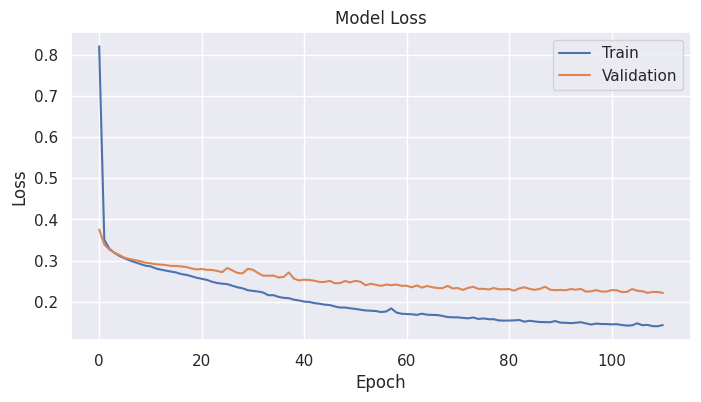

Accuracy train: 86.22%
Accuracy test: 76.24%

Training with epoch=85, batch_size=512, lambda_value=0.0001...
Training duration: 1.39 seconds


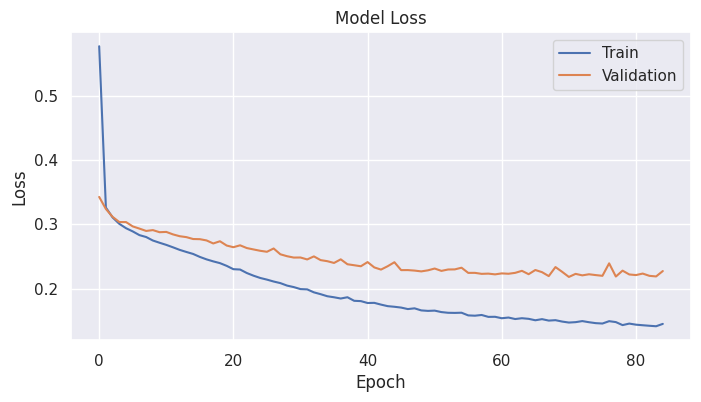

Accuracy train: 83.94%
Accuracy test: 75.69%

Training with epoch=58, batch_size=256, lambda_value=0.0001...
Training duration: 1.43 seconds


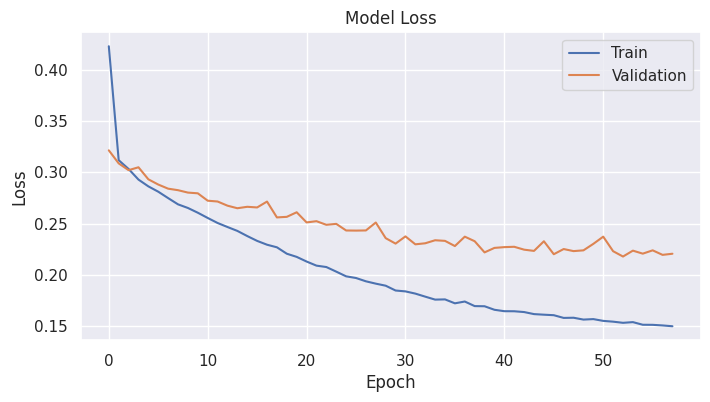

Accuracy train: 85.45%
Accuracy test: 76.14%

Training with epoch=36, batch_size=128, lambda_value=0.0001...
Training duration: 1.39 seconds


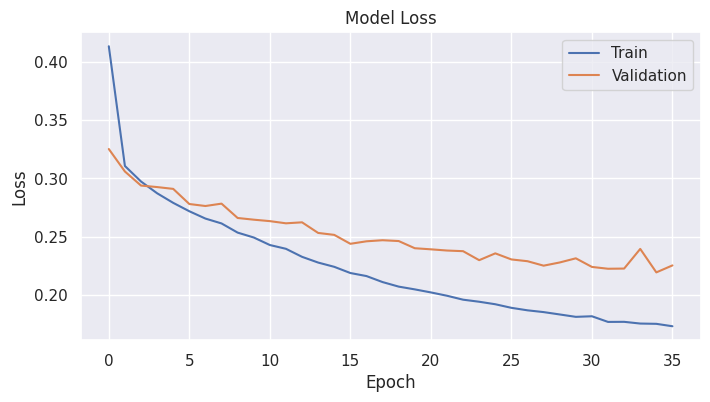

Accuracy train: 82.10%
Accuracy test: 75.40%

Training with epoch=20, batch_size=64, lambda_value=0.0001...
Training duration: 1.39 seconds


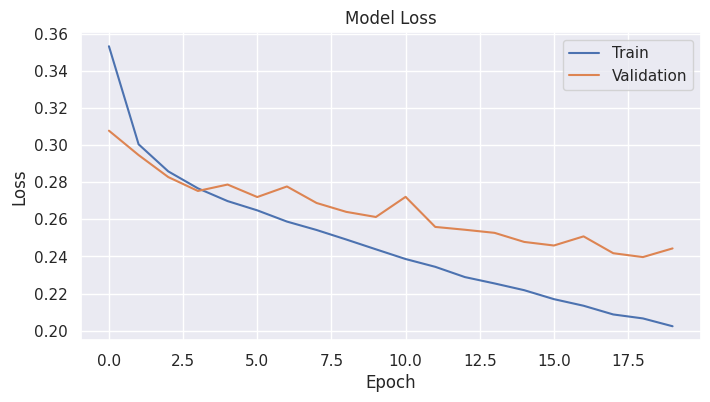

Accuracy train: 75.49%
Accuracy test: 71.48%

Training with epoch=10, batch_size=32, lambda_value=0.0001...
Training duration: 1.04 seconds


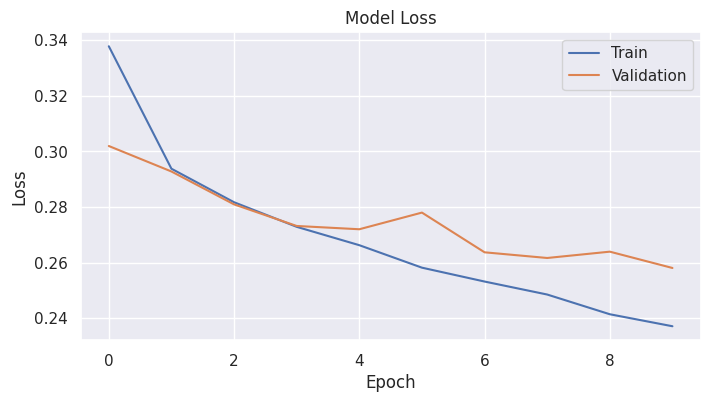

Accuracy train: 73.06%
Accuracy test: 70.61%


In [ ]:
# Values that I can change
nb_of_minutes_we_want_for_a_training = 1
batch_sizes_to_try = [1024, 512, 256, 128, 64, 32]
print(f'If we try the batch_sizes: {batch_sizes_to_try}')

# Values automatically calculated
nb_of_training_examples = X_train.shape[0]
nb_small_iteration_per_epoch = [nb_of_training_examples // batch_size for batch_size in batch_sizes_to_try]
print(f'It means {nb_small_iteration_per_epoch} iterations per epoch')
nb_minute_per_small_iteration = [0.000000115*batch_size + 0.000048806 for batch_size in batch_sizes_to_try] #numbers calculated from regression on different training data
print(f'Since each iteration takes about {nb_minute_per_small_iteration} minutes')

nb_minute_per_epoch = [nb_minute_per_small_iteration[i] * nb_small_iteration_per_epoch[i] for i in range(len(batch_sizes_to_try))]
print(f'It means {nb_minute_per_epoch} min per epoch')

nb_epoch = [round(nb_of_minutes_we_want_for_a_training // nb_minute_per_epoch[i]) for i in range(len(batch_sizes_to_try))]
print(f'Since we want {nb_of_minutes_we_want_for_a_training} minute, will respectively need {nb_epoch} epochs\n')

history_of_all_trainings = []
for i in range(len(batch_sizes_to_try)):
  model, history = train_nn_regression(nb_epoch[i], batch_sizes_to_try[i], 0.0001)
  evaluate_nn_regression(model)
  history_of_all_trainings.append(history)

Training with epoch=30, batch_size=1024, lambda_value=3e-05


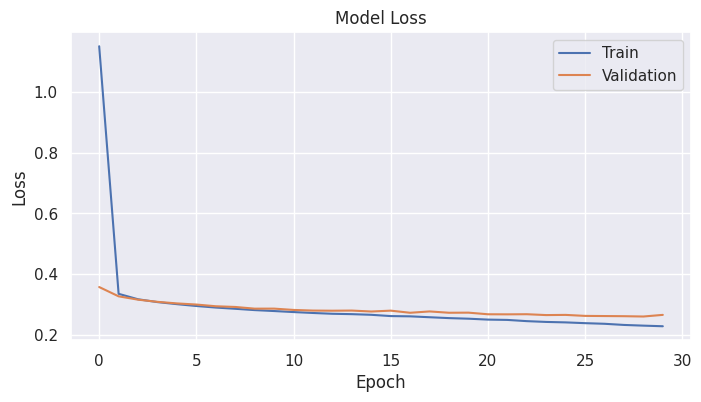

Accuracy train: 72.40%
Accuracy test: 69.56%
Training with epoch=30, batch_size=512, lambda_value=3e-05


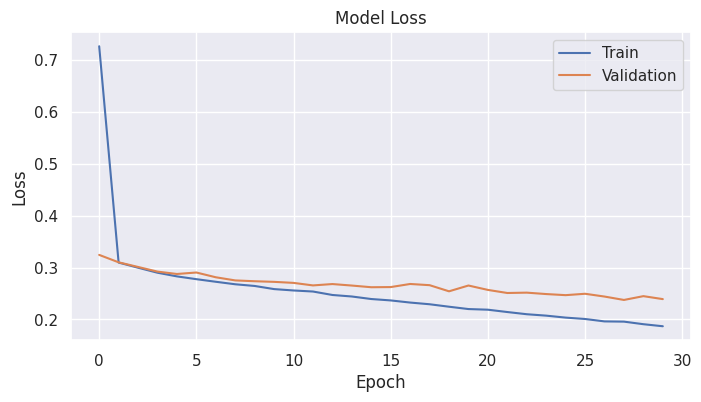

Accuracy train: 78.13%
Accuracy test: 72.40%
Training with epoch=30, batch_size=256, lambda_value=3e-05


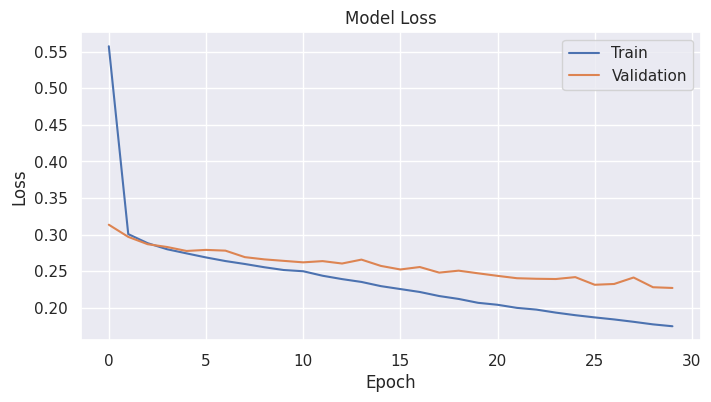

Accuracy train: 79.86%
Accuracy test: 73.26%
Training with epoch=30, batch_size=128, lambda_value=3e-05


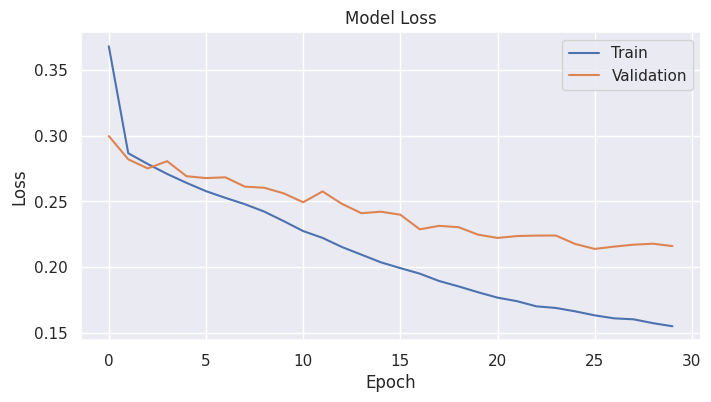

Accuracy train: 81.84%
Accuracy test: 74.81%
Training with epoch=30, batch_size=64, lambda_value=3e-05


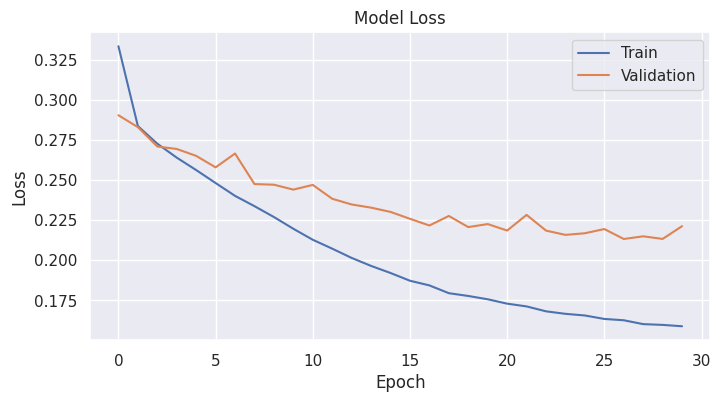

Accuracy train: 81.52%
Accuracy test: 74.49%
Training with epoch=30, batch_size=32, lambda_value=3e-05


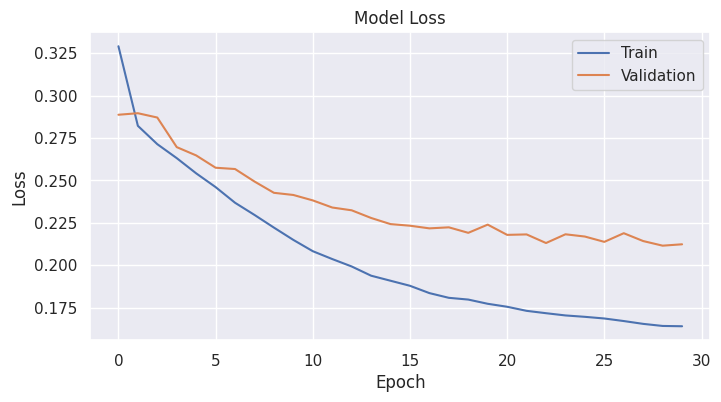

Accuracy train: 82.29%
Accuracy test: 75.91%
Training with epoch=30, batch_size=1024, lambda_value=0.0001


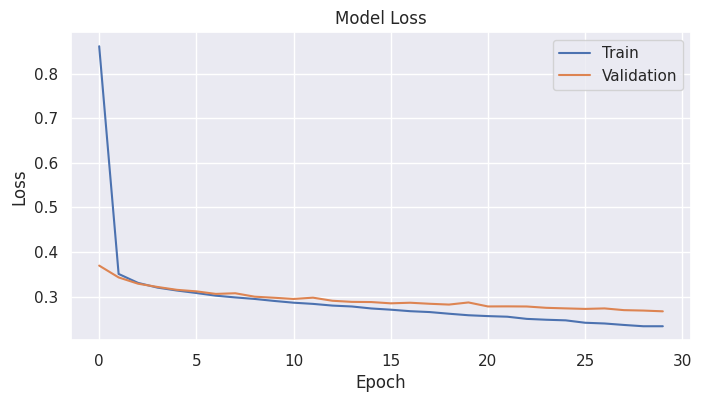

Accuracy train: 74.44%
Accuracy test: 70.66%
Training with epoch=30, batch_size=512, lambda_value=0.0001


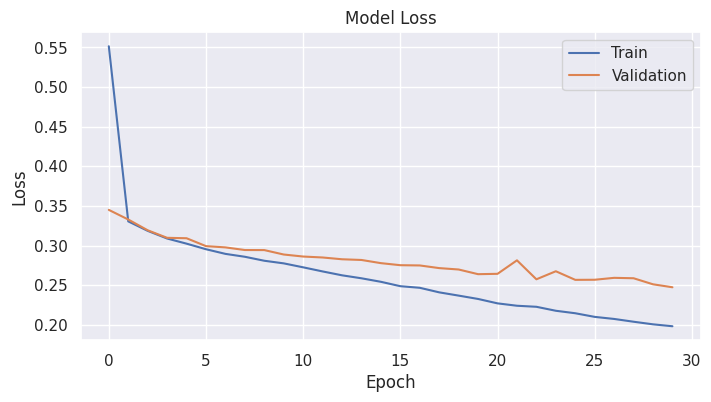

Accuracy train: 78.03%
Accuracy test: 72.40%
Training with epoch=30, batch_size=256, lambda_value=0.0001


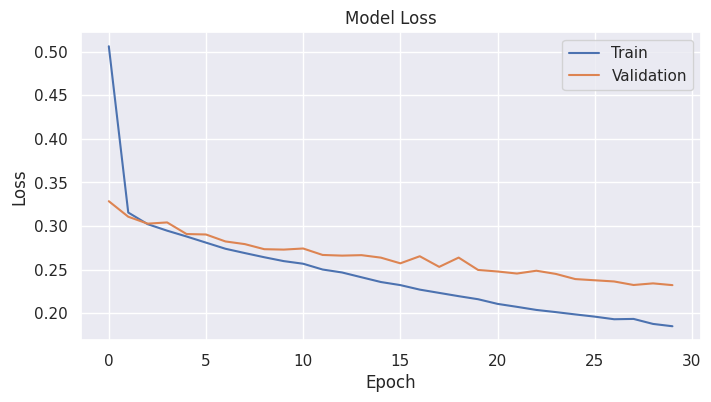

Accuracy train: 79.43%
Accuracy test: 73.79%
Training with epoch=30, batch_size=128, lambda_value=0.0001


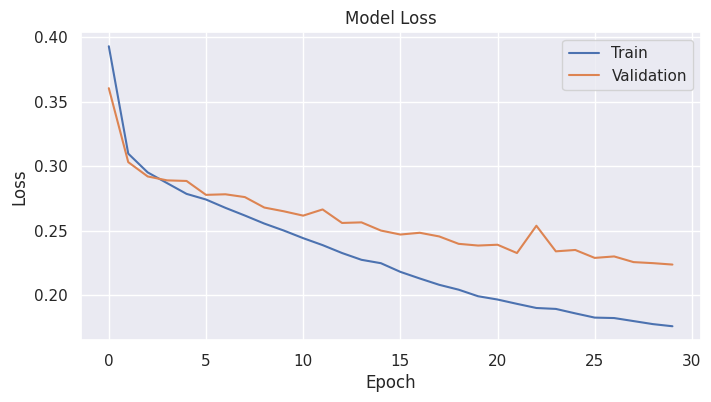

Accuracy train: 81.88%
Accuracy test: 75.49%
Training with epoch=30, batch_size=64, lambda_value=0.0001


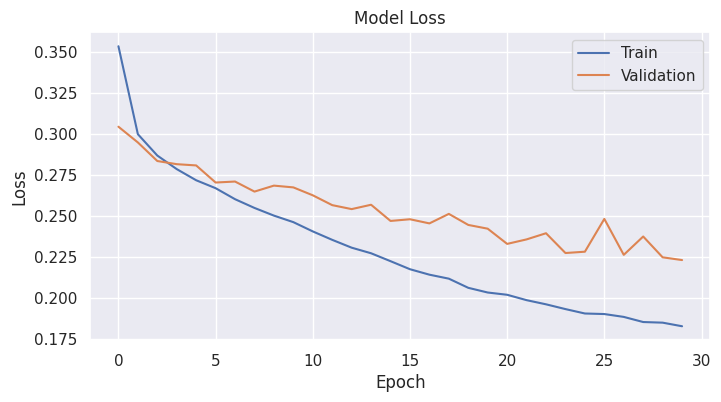

Accuracy train: 80.85%
Accuracy test: 75.39%
Training with epoch=30, batch_size=32, lambda_value=0.0001


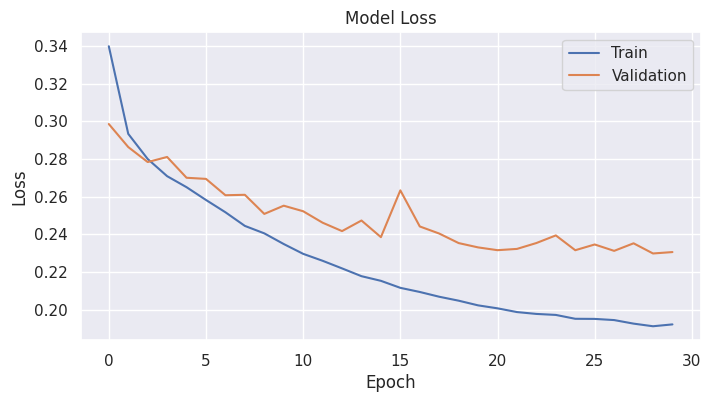

Accuracy train: 79.33%
Accuracy test: 74.64%
Training with epoch=30, batch_size=1024, lambda_value=0.0003


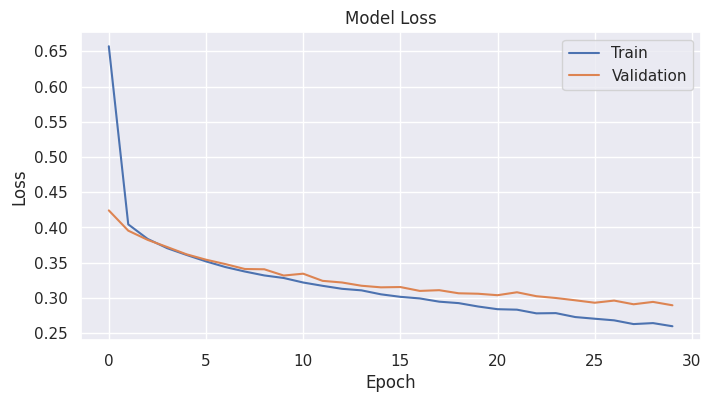

Accuracy train: 74.05%
Accuracy test: 71.08%
Training with epoch=30, batch_size=512, lambda_value=0.0003


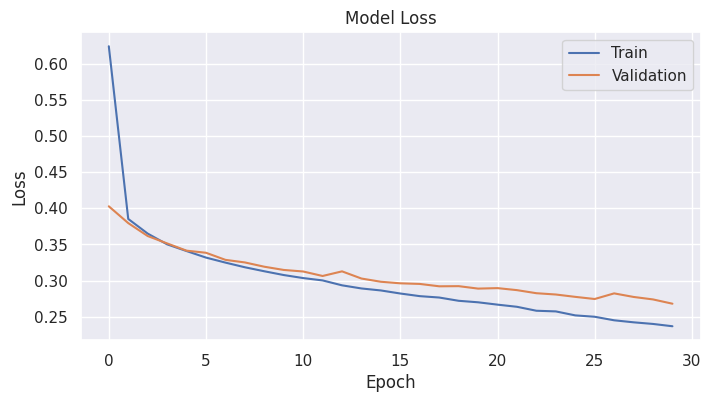

Accuracy train: 75.92%
Accuracy test: 71.92%
Training with epoch=30, batch_size=256, lambda_value=0.0003


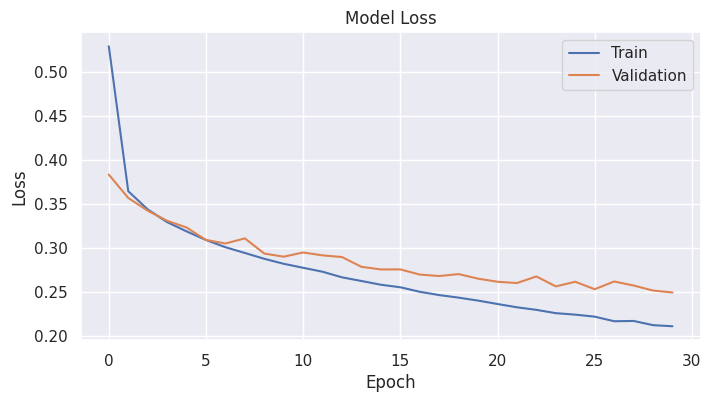

Accuracy train: 77.56%
Accuracy test: 73.08%
Training with epoch=30, batch_size=128, lambda_value=0.0003


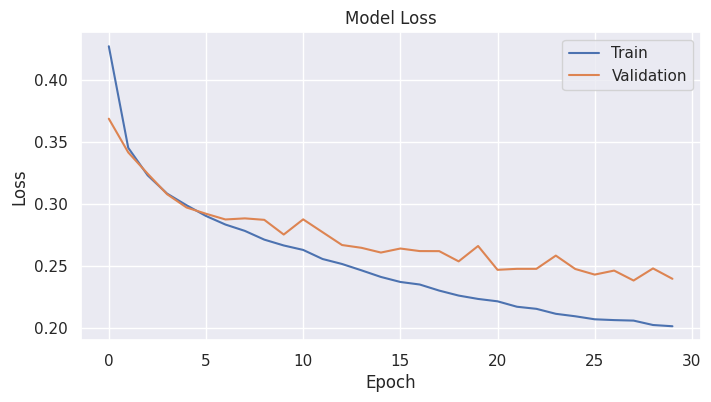

Accuracy train: 79.25%
Accuracy test: 74.34%
Training with epoch=30, batch_size=64, lambda_value=0.0003


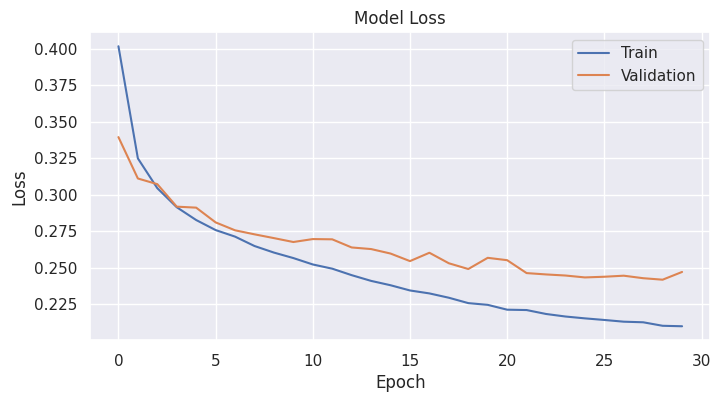

Accuracy train: 77.47%
Accuracy test: 72.99%
Training with epoch=30, batch_size=32, lambda_value=0.0003


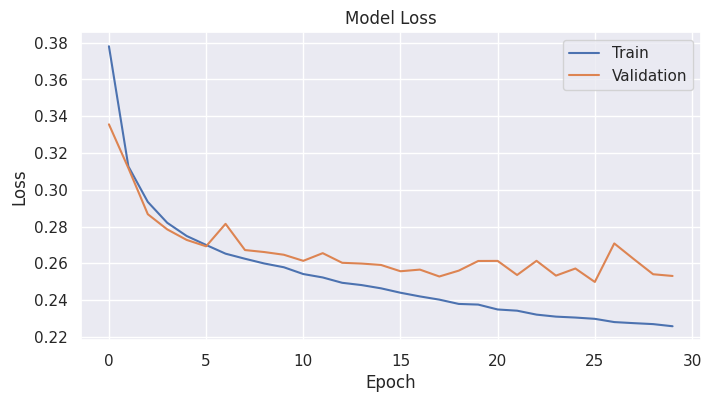

Accuracy train: 75.64%
Accuracy test: 72.54%


In [ ]:

history_of_all_trainings = []
for batch_size in batch_sizes_to_try:
  model, history = train_nn_regression(30, batch_size, 0.00003)
  evaluate_nn_regression(model)
  history_of_all_trainings.append(history)

for batch_size in batch_sizes_to_try:
  model, history = train_nn_regression(30, batch_size, 0.0001)
  evaluate_nn_regression(model)
  history_of_all_trainings.append(history)

for batch_size in batch_sizes_to_try:
  model, history = train_nn_regression(30, batch_size, 0.0003)
  evaluate_nn_regression(model)
  history_of_all_trainings.append(history)


In [ ]:
# WE WILL HAVE TO FIND A BETTER PLACE TO PUT THAT

def transform_back_to_categories(numbers_predicted):

  # Show how to convert back
  credit_score_mapping = {1: 'Poor', 2: 'Standard', 3: 'Good'}

  # Create a df
  numbers_predicted_flat = numbers_predicted.flatten()
  numbers_predicted_df = pd.DataFrame({'Credit_Score': numbers_predicted_flat})

  # Applying ordinal encoding
  categories_predicted = numbers_predicted_df['Credit_Score'].map(credit_score_mapping).to_frame('Credit_Score')

  return categories_predicted

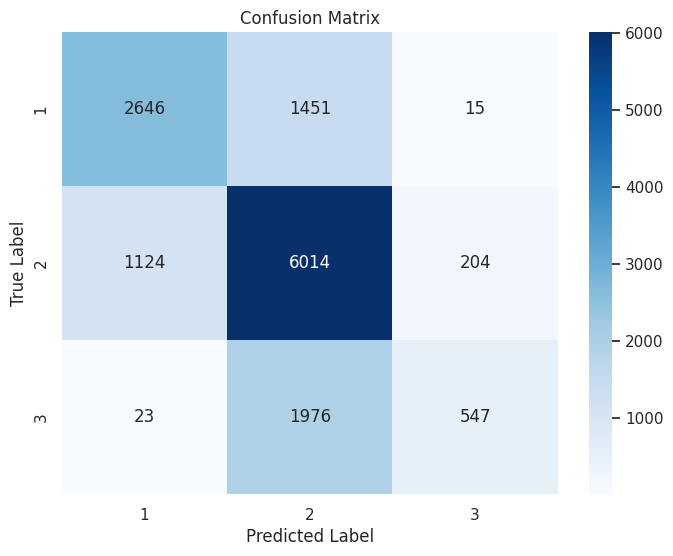

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(true_categories_test, numbers_predicted_from_test)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Generate submission

In [ ]:
def load_test_data():
    # Load the test data
    test_set_csv = pd.read_csv('test_set.csv')
    return test_set_csv

test_set_csv = load_test_data()

# Understand shape of data
print(f'Shape: {test_set_csv.shape}')

# Check for duplicates
num_duplicates = test_set_csv.duplicated().sum()
print(f'Number of duplicate rows: {num_duplicates}')

# Check for missing values
num_missing = test_set_csv.isnull().sum().sum()
print(f'Number of missing values: {num_missing}')

Shape: (30000, 27)
Number of duplicate rows: 0
Number of missing values: 0


In [ ]:
def prepare_X_test_csv(test_set_csv):

  X_test_csv_prepared = test_set_csv.copy()

  X_test_csv_prepared = full_preprocess_X(X_test_csv_prepared)
  X_test_csv_prepared = feature_engineer_X(X_test_csv_prepared)

  return X_test_csv_prepared



In [ ]:
def predict_test_categories(X_test_csv_prepared):
  numbers_predicted = predict_numbers(X_test_csv_prepared)
  categories_predicted = transform_back_to_categories(numbers_predicted)
  return categories_predicted



In [ ]:
def generate_submission():
    test_set_csv = load_test_data()
    X_test_csv_prepared = prepare_X_test_csv(test_set_csv)
    predicted_test_categories = predict_test_categories(X_test_csv_prepared)
    final_df = pd.concat([test_set_csv["ID"], predicted_test_categories["Credit_Score"]], axis=1)
    final_df.to_csv('sandbox_submission.csv', index=False)

generate_submission()

938/938 [==============================] - 2s 2ms/step
